In [1]:
import numpy as np
import pandas as pd
from cosmological_weight import CosmologicalWeight
import matplotlib.pyplot as plt
plt.style.use("plots/mesa.mplstyle")

In [2]:
# load BBHs from a 50M POSYDON pop synth at Zsun
# DATASET WITH EMBARGO UNTIL PAPER PUBLICATION
df = pd.read_csv('./datasets/arXiv_2212.10924.csv.gz',compression='gzip')

In [3]:
# Merging efficiency
print('Merging efficiency at Zsun: %1.2E Msun^-1'%(df.loc[df['t_inspiral']<13.8e3].shape[0]/df['totalMassEvolvedForZ'][0]))

# match df.columns to class_variables
class_variables = ['Dt_binary', 'm_BH1', 'm_BH2', 'spin_BH1', 'spin_BH2', 'p_f',
                   'e_f', 'Dt_inspiral', 'metallicity','totalMassEvolvedForZ']
pop = CosmologicalWeight(df, SFR='Illustris',  
                     Zsun='Asplund+09', IMF='Krupa+2001',
                     fbin='Sana+12', f_corr=False, Z_max=1.,
                     columns=df.columns.tolist(), class_variables=class_variables,
                     select_one_met=True, dlogZ=[np.log10(0.0142/2),np.log10(0.0142*2)])

# intrinsic BBH merger rate density
sensitivity = 'infinite'
pop.RunBBHsSimulation(sensitivity, flag_pdet=False, path_to_dir='../')
index, z_formation, z_merger, s_i = pop.loadBBHsSimulation(sensitivity, path_to_dir='../')
z = pop.getRedshiftBinCenter()
RateDensity = pop.RateDensity(s_i, z_merger, Type='BBHs', sensitivity='infinite')
print('Merger rate density in the local Universe (z~%1.2f):'%z[0], round(RateDensity[0],2), 'Gpc^-3 yr^-1')

# BBH detection rate
sensitivity = 'design'
pop.RunBBHsSimulation(sensitivity, flag_pdet=True, path_to_dir='../')
index_det, z_formation_det, z_merger_det, s_i_det = pop.loadBBHsSimulation(sensitivity, path_to_dir='../')
print('Detection rate:',round(sum(s_i_det),2),'yr^-1')

Merging efficiency at Zsun: 4.40E-07 Msun^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:05<00:00, 23.57it/s]


Merger rate density in the local Universe (z~0.00): 8.62 Gpc^-3 yr^-1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:09<00:00, 14.85it/s]


Detection rate: 25.15 yr^-1


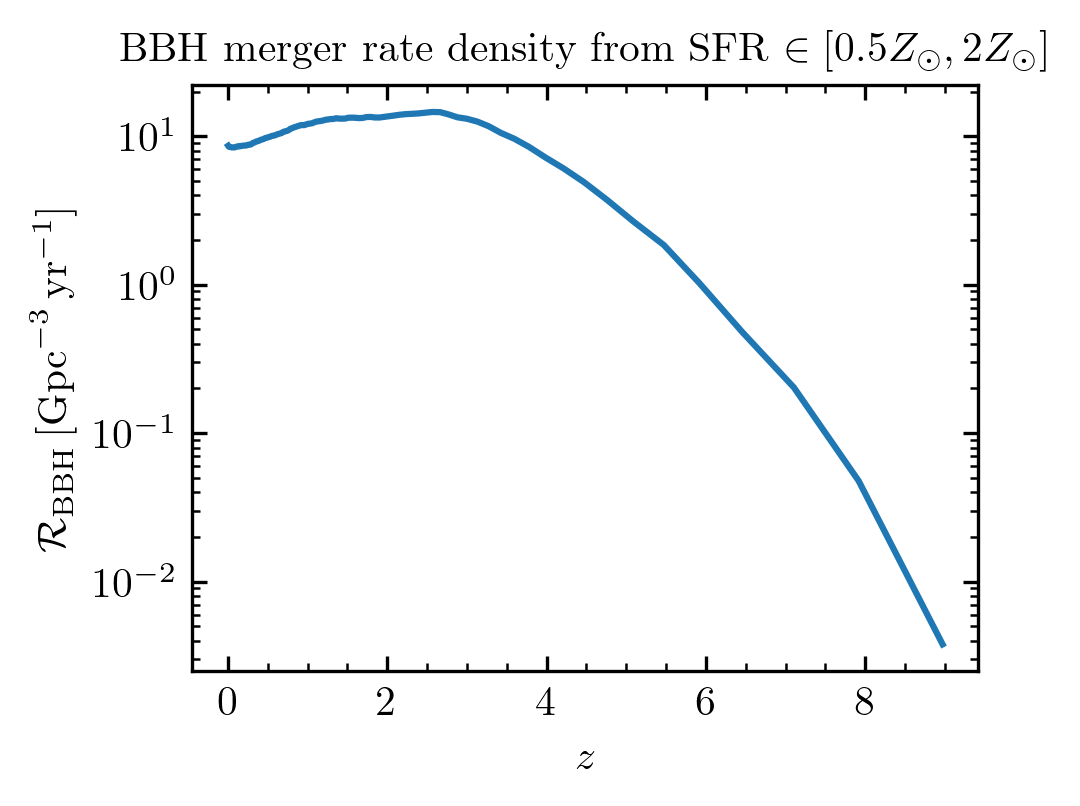

In [4]:
# plot BBH merger rate density
title = r'BBH merger rate density from SFR $\in [0.5Z_\odot,2Z_\odot]$'
plt.figure()
plt.title(title)
plt.plot(z[z<10.], RateDensity[z<10.])
plt.yscale('log')
plt.ylabel(r'$\mathcal{R}_\mathrm{BBH}\,[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$')
plt.xlabel(r'$z$')
plt.show()

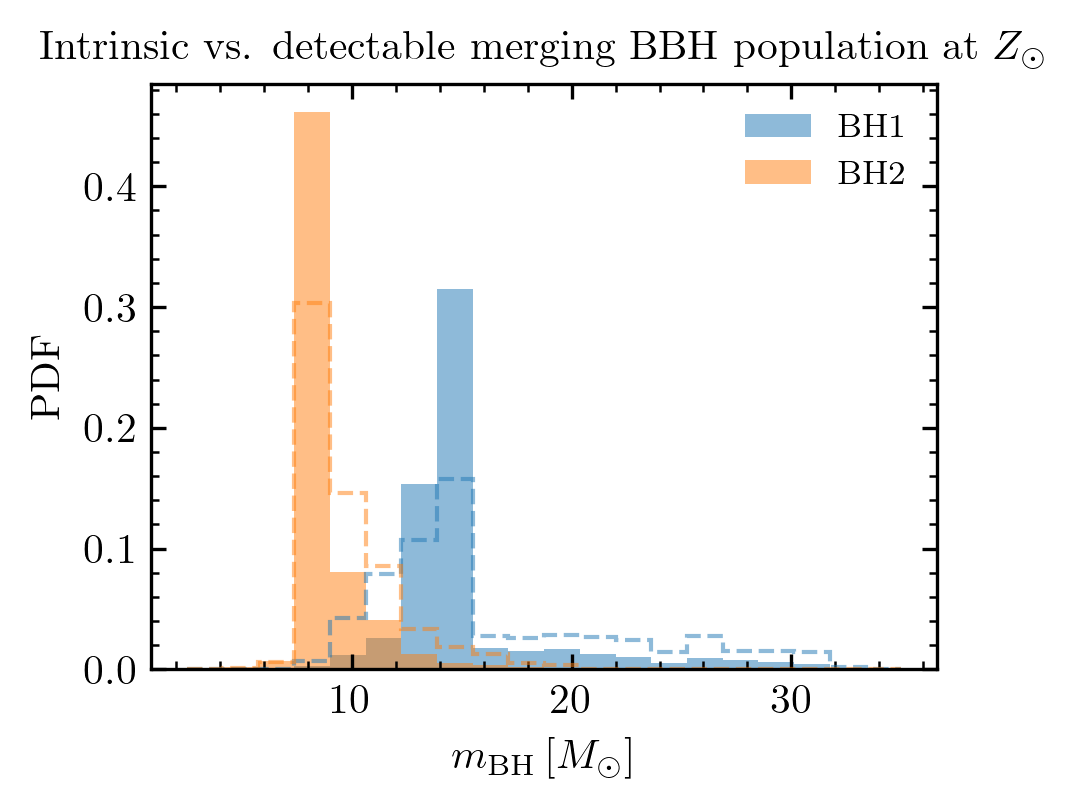

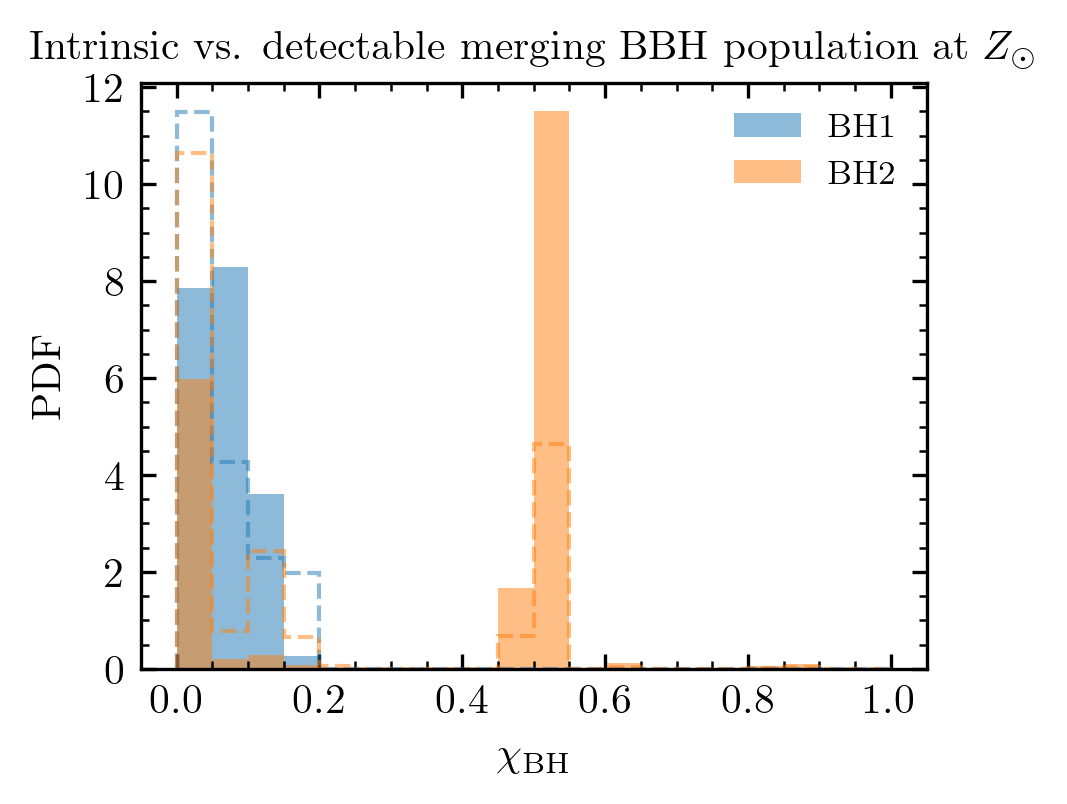

In [5]:
# plot component BH mass and spin distributions
m1 = pop.getData('m_BH1',index)
m2 = pop.getData('m_BH2',index)
m1_det = pop.getData('m_BH1',index_det)
m2_det = pop.getData('m_BH2',index_det)

plt.figure()
title = r'Intrinsic vs. detectable merging BBH population at $Z_\odot$'
plt.title(title)
plt.hist(m1,weights=s_i,label=r'BH1', color='tab:blue', alpha=0.5, density=True, range=(2.5,35), bins=20)
plt.hist(m2,weights=s_i,label=r'BH2', color='tab:orange', alpha=0.5, density=True, range=(2.5,35), bins=20)
plt.hist(m1_det,weights=s_i_det, color='tab:blue', alpha=0.5, histtype=u'step', linestyle='--', density=True, range=(2.5,35), bins=20)
plt.hist(m2_det,weights=s_i_det, color='tab:orange', alpha=0.5, histtype=u'step',  linestyle='--', density=True, range=(2.5,35), bins=20)
plt.legend(loc=1)
plt.xlabel(r'$m_\mathrm{BH}\,[M_\odot]$')
plt.ylabel(r'PDF')
plt.savefig('./plots/arXiv_221210924_Zsun_BH_masses.pdf', dpi=300, bbox_inches='tight')
plt.show()


chi1 = pop.getData('spin_BH1',index) 
chi2 = pop.getData('spin_BH2',index)
chi1_det = pop.getData('spin_BH1',index_det) 
chi2_det = pop.getData('spin_BH2',index_det)

plt.figure()
plt.title(title)
plt.hist(chi1,weights=s_i,label=r'BH1', color='tab:blue', alpha=0.5, density=True, range=(0,1), bins=20)
plt.hist(chi2,weights=s_i,label=r'BH2', color='tab:orange', alpha=0.5, density=True, range=(0,1), bins=20)
plt.hist(chi1_det,weights=s_i_det, color='tab:blue',  alpha=0.5, histtype=u'step', linestyle='--', density=True, range=(0,1), bins=20)
plt.hist(chi2_det,weights=s_i_det, color='tab:orange', alpha=0.5, histtype=u'step', linestyle='--', density=True, range=(0,1), bins=20)
plt.legend(loc=1)
plt.xlabel(r'$\chi_\mathrm{BH}$')
plt.ylabel(r'PDF')
plt.savefig('./plots/arXiv_221210924_Zsun_BH_spins.pdf', dpi=300, bbox_inches='tight')
plt.show()